# Aufgabe 14

(a) Beschreiben Sie kurz die Funktionsweise der Hauptkomponentenanalyse. Geben Sie in Worten
und in der richtigen Reihenfolge die notwendigen Berechnungen zur Durchführung der Haupt-
komponentenanalyse an.

Gegeben ist eine Matrix der Dimension d. Diese soll auf k Dimensionen reduziert werden. Dazu wird die Matrix in die Basis transformiert, bei der die Varianz entlang der Basisvektoren maximiert wird. Dazu geht man wie folgt vor:

1. Zentriere die Daten auf ihren Mittelwert. Dazu werden von allen Datenpunkten der Mittelwert der Eigenschaft (also des Arrays) abgezogen.

2. Berechne die Kovarianzmatrix aus der Datenmatrix X.

3. Berechne Eigenwerte und Eigenvektoren der Kovarianzmatrix.

4. Wähle die k größten Eigenwerte und zugehörigen Eigenvektoren aus.

5. Bilde eine d x k Matrix W mit den k Eigenvektoren als Spalten.

6. Wende W auf jede Zeile aus x aus X an $x' = W^T \cdot x^T$.

(b) Berechnen Sie die einzelnen Schritte per Hand auf dem Datensatz (in der Vorlesung wurde per Hand als mit numpy aber ohne spezielle Funktion, die die PCA durchführt definiert):

In [20]:
import numpy as np

In [21]:
x1 = np.array([1,3,1,2,3,2])
x2 = np.array([1,0,3,0,1,1])

x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
#print(x1)
#print(x2)

X = np.array([x1,x2])
#print(X.shape)

c = np.cov(X)
#print(c)

l, W = np.linalg.eigh(c)
#print(l , W)

##Reihenfolge umkehren. Größte Eigenwerte zuerst.
l = l[::-1]
W = W[:, ::-1]


X_prime = X.T @ W
#print(X_prime)

1. Die zentrierten Daten ergeben sich zu:

$x_1 = [-1, 1, -1, 0, 1, 0] \\
x_2= [0, -1, 2, -1, 0, 0]$

2. Die Kovarianzmatrix:

$\begin{pmatrix}
0,8 & -0,6 \\
-0,6 & 1,2 \\
\end{pmatrix}$

3. Die Eigenwerte sind 1,63 und 0.37. Die dazugehörigen Eigenvektoren sind:
$v_1 = (-0,58\,\, 0,81)^T, v_2 = (-0.81\,\, -0.58)^T$.

4. Es wurde nicht angegeben auf wie viele Dimensionen reduziert werden soll. Daher wird mit allen weitergerechnet. Würde das Problem auf eine Dimension reduziert werden, würde nur mit $v_1$ und dem Eingenwert 1,63 weitergemacht.

5. Die Eienmatrix ergibt sich aus den Eigenvektoren.

6. Die neue Matris X' ergibt sich zu:

$\begin{pmatrix}
0,58 & 0,81 \\
-140 & -0,23 \\
2,21 & 0,36 \\
-0,81 & 0,58 \\
-0,58 & -0.81 \\
0 & 0 \\
\end{pmatrix}$


# Aufgabe 15

a) Erzeugen Sie mit der Funktion sklearn.datasets.make_blobs einen Datensatz. Nutzen sie dabei folgende Einstellungen: n_samples=1000, centers=2, n_features=4, random_state=0. Stellen Sie nun zwei beliebige Dimensonen des Datensatzes in einem Scatterplot dar

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

from scipy.stats import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from scipy import linalg

In [23]:
import scipy

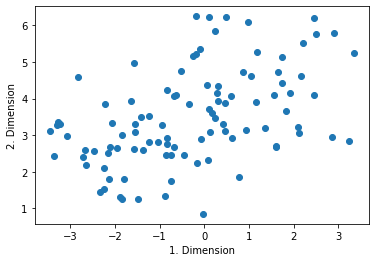

In [24]:
X, y = make_blobs(n_samples=100, n_features=4, centers=2, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('1. Dimension')
plt.ylabel('2. Dimension')
plt.show()

b) Wenden Sie nun die Hauptkomponentenanalyse auf den in a)erzeugten Datensatz an. Nutzen Sie dazu das Paket sklearn.decomposition.PCA. Wie lauten die Eigenwerte der Kovarianzmatrix? Wie interpretieren Sie die Eigenwerte?

In [25]:
#Schritt 1:Zentriere die Daten auf ihren Mittelwert
mue = np.array([np.mean(X[:,0]), np.mean(X[:,1]),
                np.mean(X[:,2]), np.mean(X[:,3])])
X_zentriert = X-mue

#Schritt 2: Hauptkomponentenanalyse

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_zentriert)

Cov_Matrix = np.cov(X_zentriert, rowvar=False)

Eigenwerte, Eigenvektoren = np.linalg.eigh(Cov_Matrix)

print(Eigenwerte)
print(Cov_Matrix)

[ 0.6553757   1.02981203  1.17151447 18.0132498 ]
[[ 2.89889424  1.02389031  2.33930355 -4.48796768]
 [ 1.02389031  1.63792291  1.60557992 -2.83450403]
 [ 2.33930355  1.60557992  3.73633957 -5.8763972 ]
 [-4.48796768 -2.83450403 -5.8763972  12.59679529]]


Die Kovarianzmatrix:


\begin{align*}
 \text{Cov} = 
 \begin{pmatrix}
                 2.90 &  1.02 &  2.34 & -4.49  \\
                 1.02 &  1.64 &  1.61 & -2.83 \\
                  2.34 &  1.61 &  3.74 & -5.88 \\
                -4.49 & -2.83 & -5.88 & 12.60 \\
  \end{pmatrix}
\end{align*}


Die Eigenwerte der Kovarianzmatrix:

\begin{align*}
  \lambda_1 = 0.66 \\
  \lambda_2 = 1.03 \\
  \lambda_3 = 1.17 \\
  \lambda_4 = 18.01 \\
\end{align*}

Interpretation der Eigenwerte: $\lambda_4$ ist die Hauptkomponente mit dem größten Eigenwert und ist deshalb für eine Reduktion der Daten am entscheidensten. Die anderen Eigenwerte sind deutlich kleiner.

(c) Histrogrammieren Sie nun 𝑥′in jeder Dimension und stellen sie 𝑥'1 und 𝑥′2 in einem Scatterplot dar.

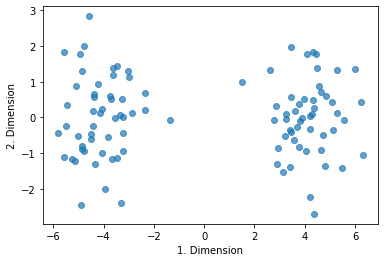

In [26]:

plt.scatter(X_pca[:,0],X_pca[:,1], alpha=0.7)
plt.xlabel('1. Dimension')
plt.ylabel('2. Dimension')
plt.savefig('Scatterplot_pca.pdf')
plt.show()

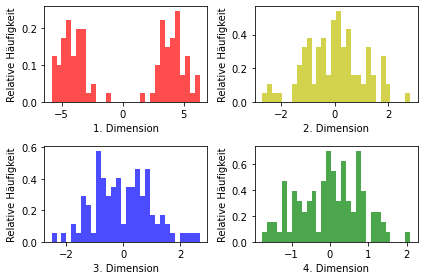

In [27]:
plt.subplot(2, 2, 1)
plt.hist(X_pca[:,0],color='r', density=True, bins=30, label='1. Dimension', alpha=0.7)
plt.ylabel('Relative Häufigkeit')
plt.xlabel('1. Dimension')
plt.tight_layout()
plt.subplot(2, 2, 2)
plt.hist(X_pca[:,1],color='y', density=True, bins=30, label='2. Dimension', alpha=0.7)
plt.ylabel('Relative Häufigkeit')
plt.xlabel('2. Dimension')
plt.tight_layout()
plt.subplot(2, 2, 3)
plt.hist(X_pca[:,2],color='b', density=True, bins=30, label='3. Dimension', alpha=0.7)
plt.ylabel('Relative Häufigkeit')
plt.xlabel('3. Dimension')
plt.tight_layout()
plt.subplot(2, 2, 4)
plt.hist(X_pca[:,3],color='g', density=True, bins=30, label='4. Dimension', alpha=0.7)
plt.ylabel('Relative Häufigkeit')
plt.xlabel('4. Dimension')
plt.savefig('Histogramm.pdf')
plt.show()